# Question A: Likelihood Distribution and MLE

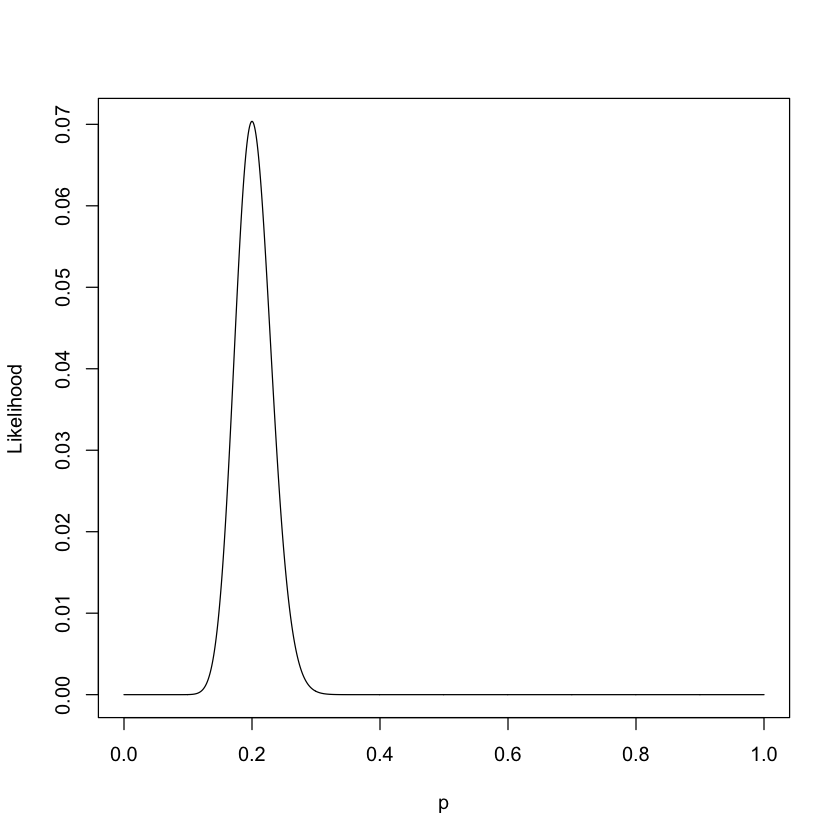

In [4]:
#Likelihood Distribution of p
n <- 200 #The number of alleles sampled
k <- 40 #The number of instances of G
p <- seq(0, 1, length=1000)
L <- choose(n,k)*(p^k)*((1-p)^(n-k)) #Define the binomial likelihood function
plot(x=p, y=L, xlab="p", ylab="Likelihood", type="l")

In [8]:
#MLE
mle <-  p[which.max(L)]
print("MLE = ")
print(mle)

[1] "MLE = "
[1] 0.2002002


# Question B: Likelihood Ratio Test

In [9]:
LR <- 2*(log(L[2])-log(max(L)))
print("P-value = ")
print(pchisq(LR,df=1))

[1] "P-value = "
[1] 0


# Question C: Posterior Probability

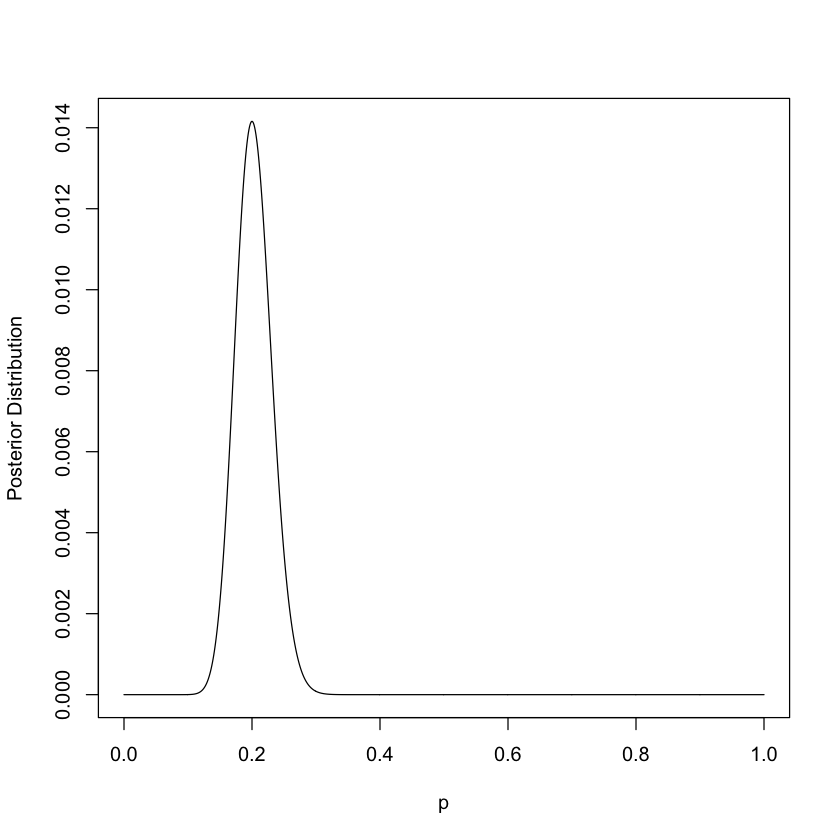

In [10]:
#Posterior probability function
posterior <- dbeta(p,k+1,n-k+1) #Define the posterior probability function
posterior <- posterior/sum(posterior) #Normalize the posterior probability
plot(x=p, y=posterior, xlab="p", ylab="Posterior Distribution", type="l")

In [11]:
#Calculate MAP
map <-  p[which.max(posterior)]
print(map)

[1] 0.2002002


In [13]:
#Find the 95% HPD
qPosterior = qbeta(p,k+1,n-k+1) #The qbeta function gives us the beta quantile function
quantile(qPosterior,c(0.025,0.975)) #Output the 2.5% and 97.5% quantiles

#These quantiles represent the bounds of the 95% HPD since 95% of the probability distribution falls between these
#values and it is symmetric

2.5%     97.5% 
0.1505351 0.2609736

In [14]:
#Print other quantiles
quantile(qPosterior)

0%       25%       50%       75%      100% 
0.0000000 0.1833742 0.2019887 0.2215000 1.0000000

[1] "MAP = "
[1] 0.2002002
[1] "95% HPD = "


2.5%      97.5% 
0.08217559 0.41906685

[1] "Other quantiles:"


0%       25%       50%       75%      100% 
0.0000000 0.1631142 0.2189054 0.2826006 1.0000000

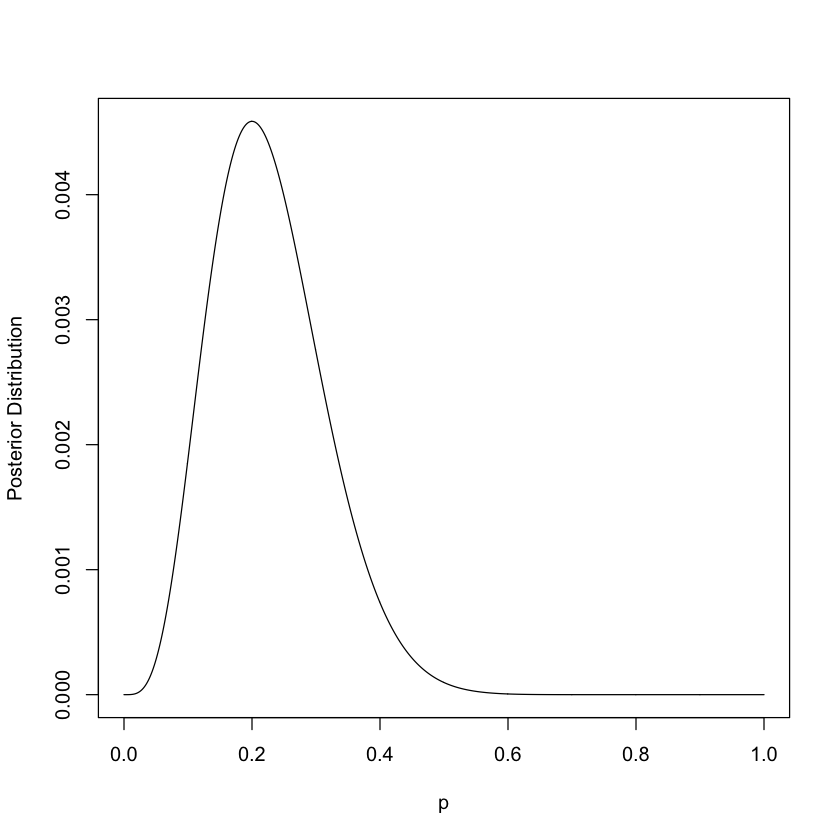

In [15]:
#Now, lets look at the case where we have samples from only 10 individuals and run the same analyses as before
n<-20
k<-4
posterior <- dbeta(p,k+1,n-k+1)
posterior <- posterior/sum(posterior)
plot(x=p, y=posterior, xlab="p", ylab="Posterior Distribution", type="l")

map <-  p[which.max(posterior)]
print("MAP = ")
print(map)

qPosterior = qbeta(p,k+1,n-k+1)
print("95% HPD = ")
quantile(qPosterior,c(0.025,0.975))

print("Other quantiles:")
quantile(qPosterior)

# Question D: Posterior Distribution with Informative Prior

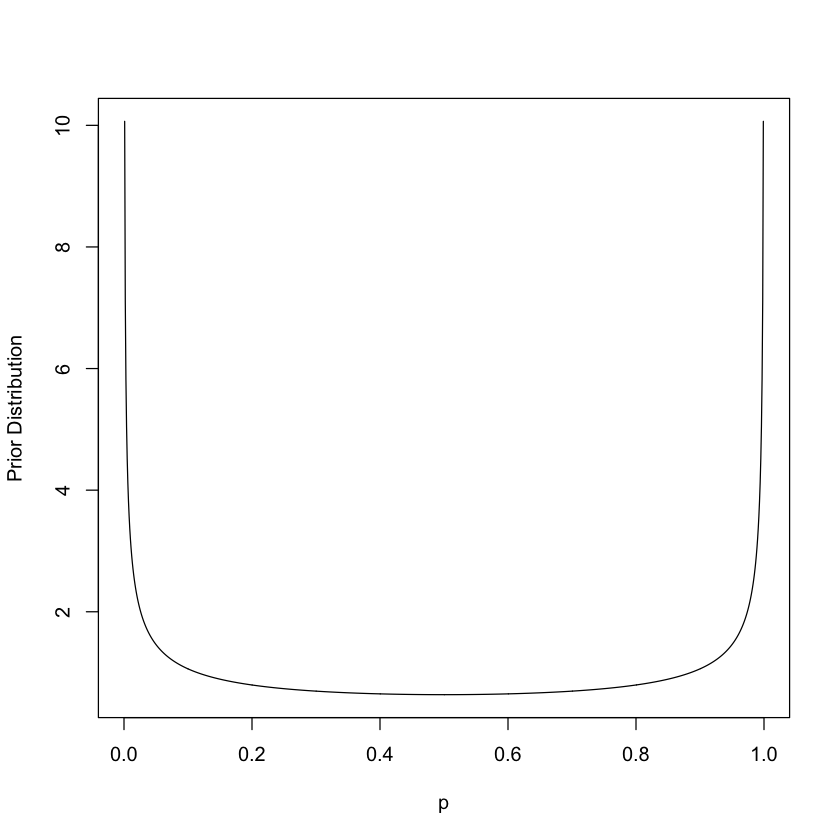

In [17]:
#Define the prior distribution
#Just from looking at Wikipedia, I found that a beta distribution with alpha and beta = 0.5 gives us the U=shaped
#distribution that is appropriate for characterizing allele frequencies
prior <- dbeta(p,0.5,0.5)
plot(x=p, y=prior, xlab="p", ylab="Prior Distribution", type="l")

[1] "MAP = "
[1] 0.1981982
[1] "95% HPD = "


2.5%     97.5% 
0.1505351 0.2609736

[1] "Other quantiles:"


0%       25%       50%       75%      100% 
0.0000000 0.1833742 0.2019887 0.2215000 1.0000000

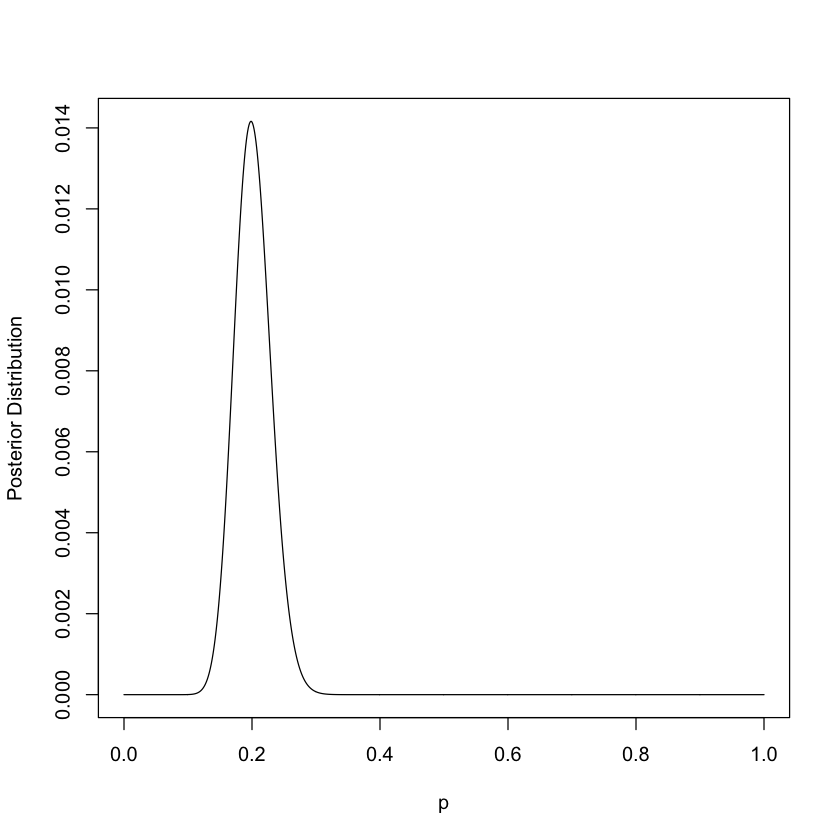

In [19]:
#Define the posterior distribution for 100 individuals sampled
n<-200
k<-40
posterior <- dbeta(p,k+0.5,n-k+0.5) #define the posterior probability function based on the Beta-Binomial model
posterior <- posterior/sum(posterior) #normalize the posterior function
plot(x=p, y=posterior, xlab="p", ylab="Posterior Distribution", type="l")

#Run MAP, 95% HPD, and quantile analyses
map <-  p[which.max(posterior)]
print("MAP = ")
print(map)

qPosterior = qbeta(p,k+1,n-k+1)
print("95% HPD = ")
quantile(qPosterior,c(0.025,0.975))

print("Other quantiles:")
quantile(qPosterior)

[1] "MAP = "
[1] 0.1841842
[1] "95% HPD = "


2.5%      97.5% 
0.08217559 0.41906685

[1] "Other quantiles:"


0%       25%       50%       75%      100% 
0.0000000 0.1631142 0.2189054 0.2826006 1.0000000

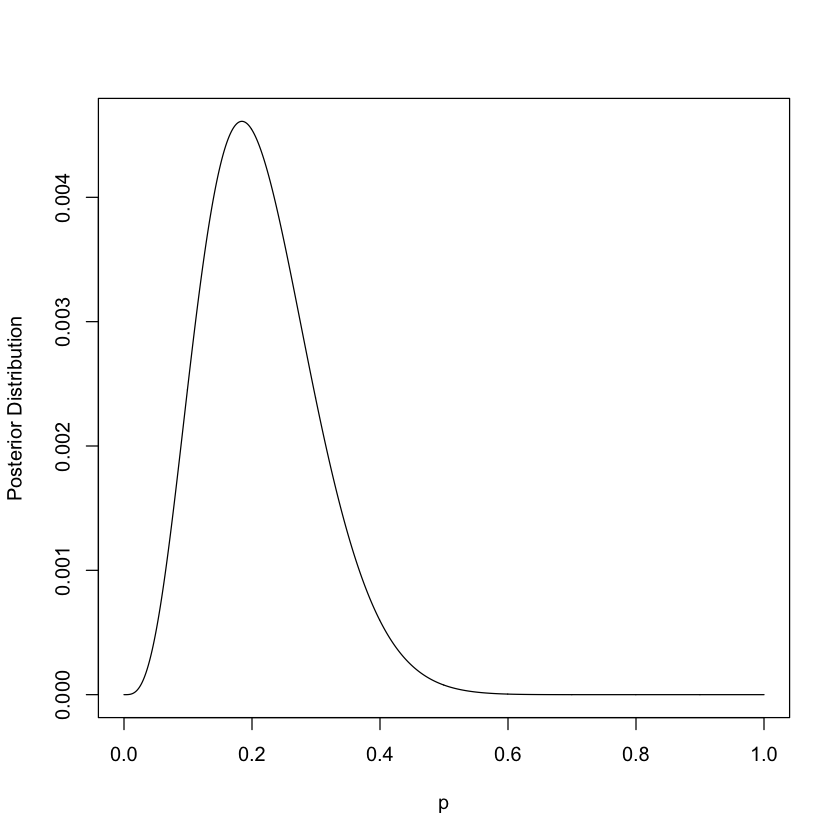

In [20]:
#Now lets do the same, but in the case where only 10 individuals are sampled
n<-20
k<-4
posterior <- dbeta(p,k+0.5,n-k+0.5)
posterior <- posterior/sum(posterior)
plot(x=p, y=posterior, xlab="p", ylab="Posterior Distribution", type="l")

map <-  p[which.max(posterior)]
print("MAP = ")
print(map)

qPosterior = qbeta(p,k+1,n-k+1)
print("95% HPD = ")
quantile(qPosterior,c(0.025,0.975))

print("Other quantiles:")
quantile(qPosterior)

# Question E: Bayes Factor

[1] "p <= 0.5: "
[1] 1
[1] "p > 0.5: "
[1] 0
[1] "Bayes Factor: "
[1] Inf


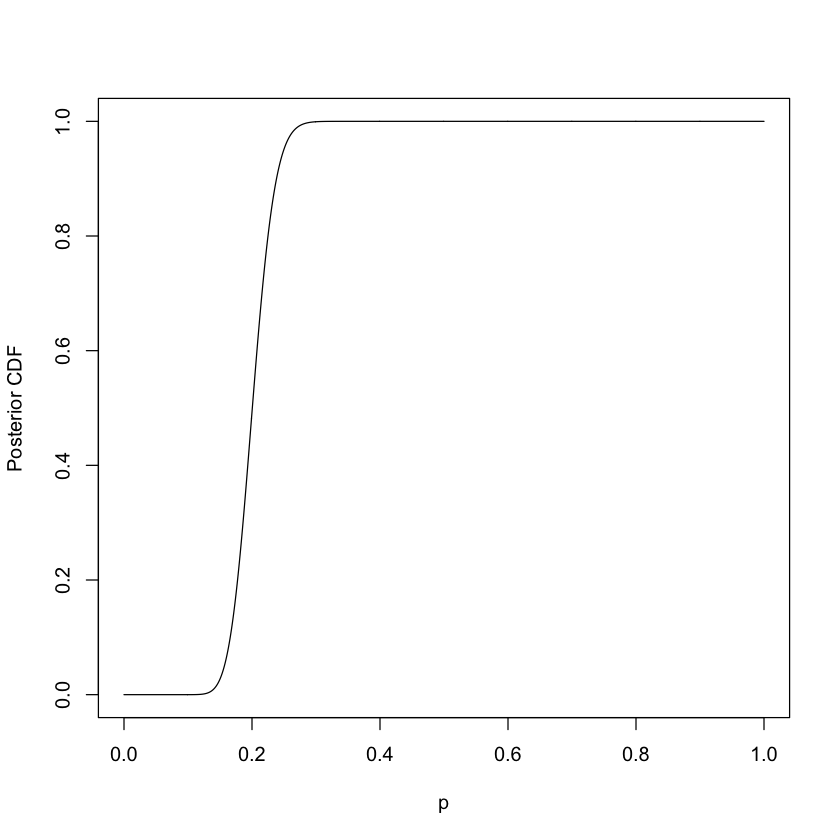

In [21]:
#Calculate Bayes Factor for 100 individuals
n<-200
k<-40
posterior <- pbeta(p,k+0.5,n-k+0.5) #pbeta gives you the beta CDF function
plot(x=p, y=posterior, xlab="p", ylab="Posterior CDF", type="l") #plot CDF function

#find the probability that p <= 0.5 by getting the value of the posterior function at the half-way point
#in this case, my p vector has 1000 values, so the halfway point is at the 500th index
print("p <= 0.5: ")
print(posterior[500])
#the probability of p > 0.5 is simply 1-(p<=0.5)
print("p > 0.5: ")
print(1-posterior[500])
#Calculate Bayes Factor
print("Bayes Factor: ")
print(posterior[500]/(1-posterior[500]))

[1] "p <= 0.5: "
[1] 0.9970982
[1] "p > 0.5: "
[1] 0.002901802
[1] "Bayes Factor: "
[1] 343.6135


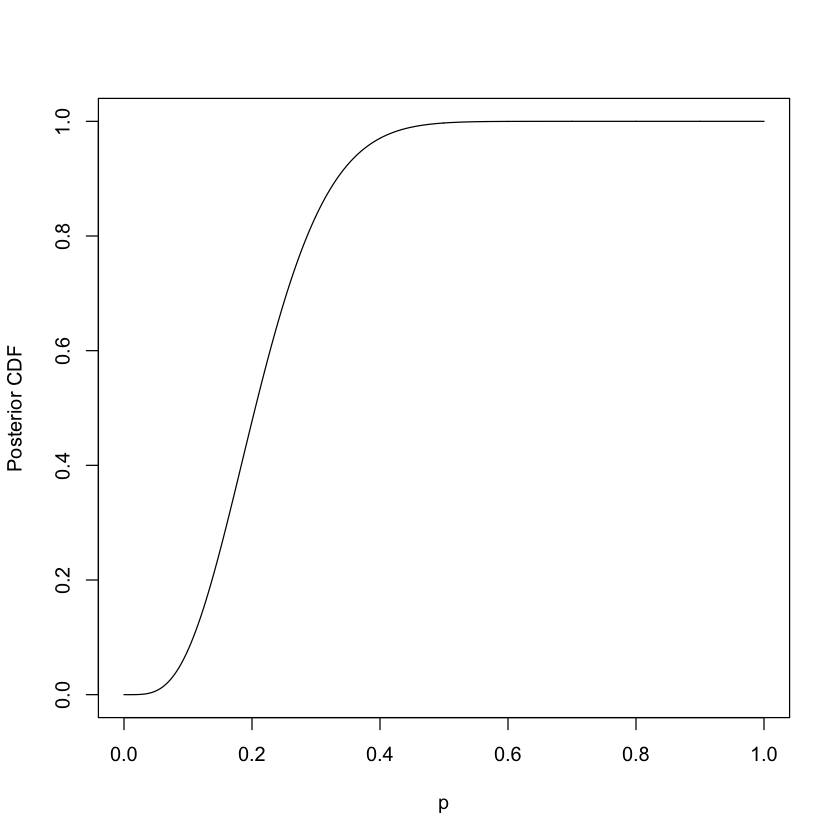

In [22]:
#Calculate Bayes Factor for 20 individuals
n<-20
k<-4
posterior <- pbeta(p,k+0.5,n-k+0.5)
plot(x=p, y=posterior, xlab="p", ylab="Posterior CDF", type="l")

print("p <= 0.5: ")
print(posterior[500])
print("p > 0.5: ")
print(1-posterior[500])
print("Bayes Factor: ")
print(posterior[500]/(1-posterior[500]))